In [7]:
import pandas as pd
import numpy as np 
from random import randint, random
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
import re

In [8]:

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.graph_objects as go
import plotly.express as px


In [4]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()


/home/danpdvn/.local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
URL = 'https://docs.google.com/document/u/0/d/1Uqq7PPDlCciayStO_lm_voe--grX2x4SroWyuoVDDPw/mobilebasic'
exec_path = "../bin/geckodriver"
#----------------------------------------------#

#-------OPTIONS--------------------------------#

options = Options()
options.headless = True
# options.add_argument("--window-size=1920,1200")
options.add_argument("--enable-javascript")

#----------------------------------------------#
firefox_profile = webdriver.FirefoxProfile()
firefox_profile.set_preference("intl.accept_languages", "fr")
firefox_profile.update_preferences()

driver = webdriver.Firefox(executable_path=exec_path, options=options,firefox_profile=firefox_profile)
driver.get(URL)
rs=[]
# for word in driver.find_elements_by_xpath('//div[@class="row mb45"][3]'):
for i in driver.find_elements_by_xpath('/html/body/div[2]/div/div/div/p/span'):
    if re.match("^\d", i.text):
        rs.append(re.sub("^\d*\.","",i.text))
        

driver.quit()
# return [ i for j in list_w for i in j]

In [31]:
rs

[' Je m’appelle Clara. J’ai 20 ans. de',
 ' A., 21 ans. Mes crises d’angoisse ont augmenté en fréquence et en intensité, ma vue a baissé de manière notoire à cause du temps passé sur l’ordinateur.',
 ' Maxime, 20 ans. Aujourd’hui mon Erasmus, pour lequel j’ai tant donné, a disparu comme mes rêves. Aujourd’hui, je rêve simplement de pouvoir marcher, car avec ma santé fragilisée, je ne le peux plus.',
 ' Chloé, 22 ans. L’inactivité et l’angoisse me font retomber dans un rapport malsain à la nourriture, alors que j’avais réussi à vaincre l’anorexie depuis 6 ans.',
 ' Roxanne, 23 ans. J’ai perdu toute motivation. Je sais que je vais passer mon deuxième semestre de Master 1 comme le premier : la journée assise devant l’écran de mon ordinateur, sans aucune interaction sociale. J’ai la sensation d’être le dindon de la farce lorsque je vois les enfants en école primaire, les collégiens et lycéens, les travailleurs, être autorisés à mener une vie à peu près normale en',
 ' Agathe, 22 ans. Pour 

In [10]:
data = pd.DataFrame(rs, columns=["Comment"])
data = data[data["Comment"]!=""]
data["Comment"]= data["Comment"].str.lower()



# AComment=[]
# for comment in data["Comment"].apply(str):
#     Word_Tok = []
#     for word in  re.sub("\W"," ",comment ).split():
#         Word_Tok.append(word)
#     AComment.append(Word_Tok)
# data["Word_Tok"]= AComment

# stop_words=set(STOP_WORDS)

# deselect_stop_words = ['n\'', 'ne','pas','plus','personne','aucun','ni','aucune','rien']
# for w in deselect_stop_words:
#     if w in stop_words:
#         stop_words.remove(w)
#     else:
#         continue
        
# AllfilteredComment=[]
# for comment in data["Word_Tok"]:
#     filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
#     AllfilteredComment.append(' '.join(filteredComment))
# data["CommentAferPreproc"]=AllfilteredComment


In [12]:
data

,Comment,Word_Tok,CommentAferPreproc
0,je m’appelle clara. j’ai 20 ans. de,"[je, m, appelle, clara, j, ai, 20, ans, de]",appelle clara 20 ans
1,"a., 21 ans. mes crises d’angoisse ont augment...","[a, 21, ans, mes, crises, d, angoisse, ont, au...",21 ans crises angoisse augmenté fréquence inte...
2,"maxime, 20 ans. aujourd’hui mon erasmus, pour...","[maxime, 20, ans, aujourd, hui, mon, erasmus, ...",maxime 20 ans erasmus donné disparu rêves rêve...
3,"chloé, 22 ans. l’inactivité et l’angoisse me ...","[chloé, 22, ans, l, inactivité, et, l, angoiss...",chloé 22 ans inactivité angoisse retomber rapp...
4,"roxanne, 23 ans. j’ai perdu toute motivation....","[roxanne, 23, ans, j, ai, perdu, toute, motiva...",roxanne 23 ans perdu motivation sais passer se...
...,...,...,...
155,1a en,"[1a, en]",1a
157,"claire wilb, 20 ans, étudiante en troisième a...","[claire, wilb, 20, ans, étudiante, en, troisiè...",claire wilb 20 ans étudiante année licence aes...
158,"clarisse, 23 ans, en école d’ingénieurs.\nje ...","[clarisse, 23, ans, en, école, d, ingénieurs, ...",clarisse 23 ans école ingénieurs dernière anné...
159,"emilien, 20 ans, l3 histoire science politiqu...","[emilien, 20, ans, l3, histoire, science, poli...",emilien 20 ans l3 histoire science politique u...


In [59]:
pd.DataFrame(senti_list, columns=["très négatif", "négatif", "légèrement négatif"])
# data

,très négatif,négatif,légèrement négatif
0,0.000,1.000,0.000
1,0.194,0.686,0.120
2,0.102,0.645,0.253
3,0.293,0.552,0.155
4,0.145,0.785,0.070
...,...,...,...
154,0.000,1.000,0.000
155,0.000,0.755,0.245
156,0.000,1.000,0.000
157,0.216,0.635,0.149


In [16]:
senti_list = []
for i in data["CommentAferPreproc"]:
    vs = SIA.polarity_scores(i)
    senti_list.append( [vs['neg'], vs['neu'], vs['pos']])
#     if (vs > 0):
#         senti_list.append('Positive')
#     elif (vs < 0):
#         senti_list.append('Negative')
#     else:
#         senti_list.append('Neutral')   
        
# data["sentiment"]=senti_list


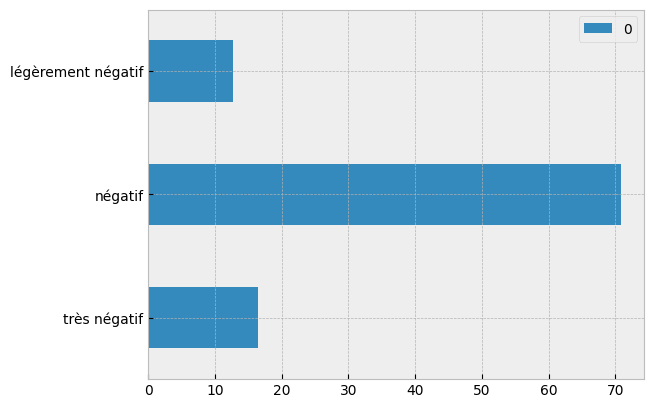

In [55]:
plt.style.use('bmh')
pd.DataFrame(senti_list, columns=["très négatif", "négatif", "légèrement négatif"]).sum().to_frame().apply(lambda x : round(x/x.sum()*100, 2)) .plot(kind='barh')

[nltk_data] Downloading package punkt to /home/danpdvn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


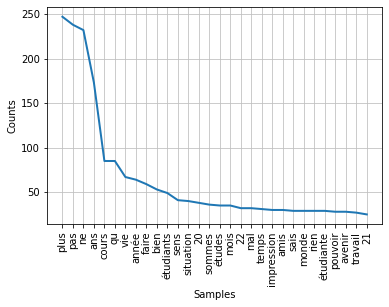

In [34]:
import nltk
nltk.download('punkt')
tokens = nltk.tokenize.word_tokenize(data['CommentAferPreproc'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
fd = nltk.FreqDist(tokens)
fd.plot(30,cumulative=False)



In [37]:
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError(
            "The plot function requires matplotlib to be installed."
            "See http://matplotlib.org/"
        )

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [
        (x, y)
        for x in range(len(text_to_comp))
        for y in range(len(words_to_comp))
        if text_to_comp[x] == words_to_comp[y]
    ]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
    pylab.plot(x, y, "b|", scalex=0.1)
    pylab.yticks(list(range(len(words))), words, color="b")
    pylab.ylim(-1, len(words))
    pylab.title(title)
    pylab.xlabel("Word Offset")
    pylab.show()

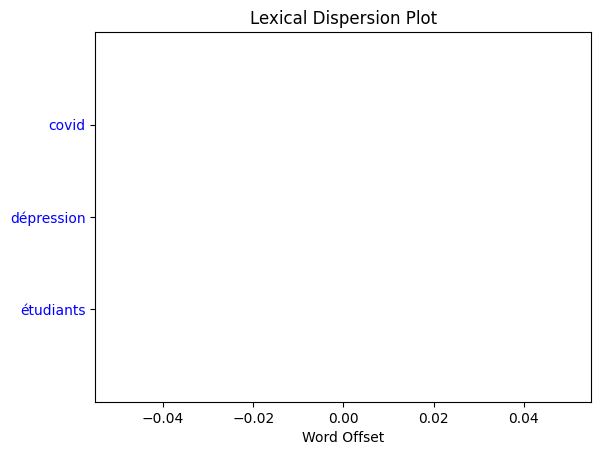

In [43]:
import matplotlib as plt
plt.style.use('bmh')
word = ['covid', 'dépression', 'étudiants']
dispersion_plot(data['Comment'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '), word)

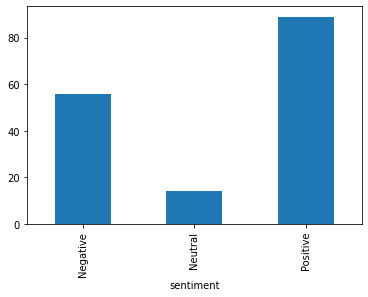

## regarer transformers pour un model 


In [2]:
import torch
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")
results = classifier(data)

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

NameError: name 'data' is not defined

In [23]:
pip install torch


     |████████████████████████████████| 804.1 MB 6.9 kB/s eta 0:00:01   |                                | 163 kB 942 kB/s eta 0:14:13     |▎                               | 6.2 MB 777 kB/s eta 0:17:06     |▌                               | 11.5 MB 487 kB/s eta 0:27:05     |▊                               | 18.9 MB 587 kB/s eta 0:22:17     |█                               | 24.0 MB 269 kB/s eta 0:48:16     |█▎                              | 31.5 MB 789 kB/s eta 0:16:19     |█▍                              | 35.8 MB 657 kB/s eta 0:19:29     |█▌                              | 38.3 MB 939 kB/s eta 0:13:36     |█▋                              | 41.0 MB 942 kB/s eta 0:13:30     |█▋                              | 41.8 MB 673 kB/s eta 0:18:52     |█▉                              | 46.7 MB 958 kB/s eta 0:13:10     |██▌                             | 63.9 MB 392 kB/s eta 0:31:28     |███                             | 78.1 MB 199 kB/s eta 1:00:31     |███▍                            | 86.0 MB 111